In [16]:
library(tidyr)
library(ggplot2)
library(Seurat)
library(dplyr)
library(ggplot2)
library(viridis)
source("../Scripts/functions.R")
source("../Scripts/plots.R")
options(repr.plot.width=10, repr.plot.height=10)
output="../Results/"
library(igraph)
library(network)
library(ggraph)

[1] 69

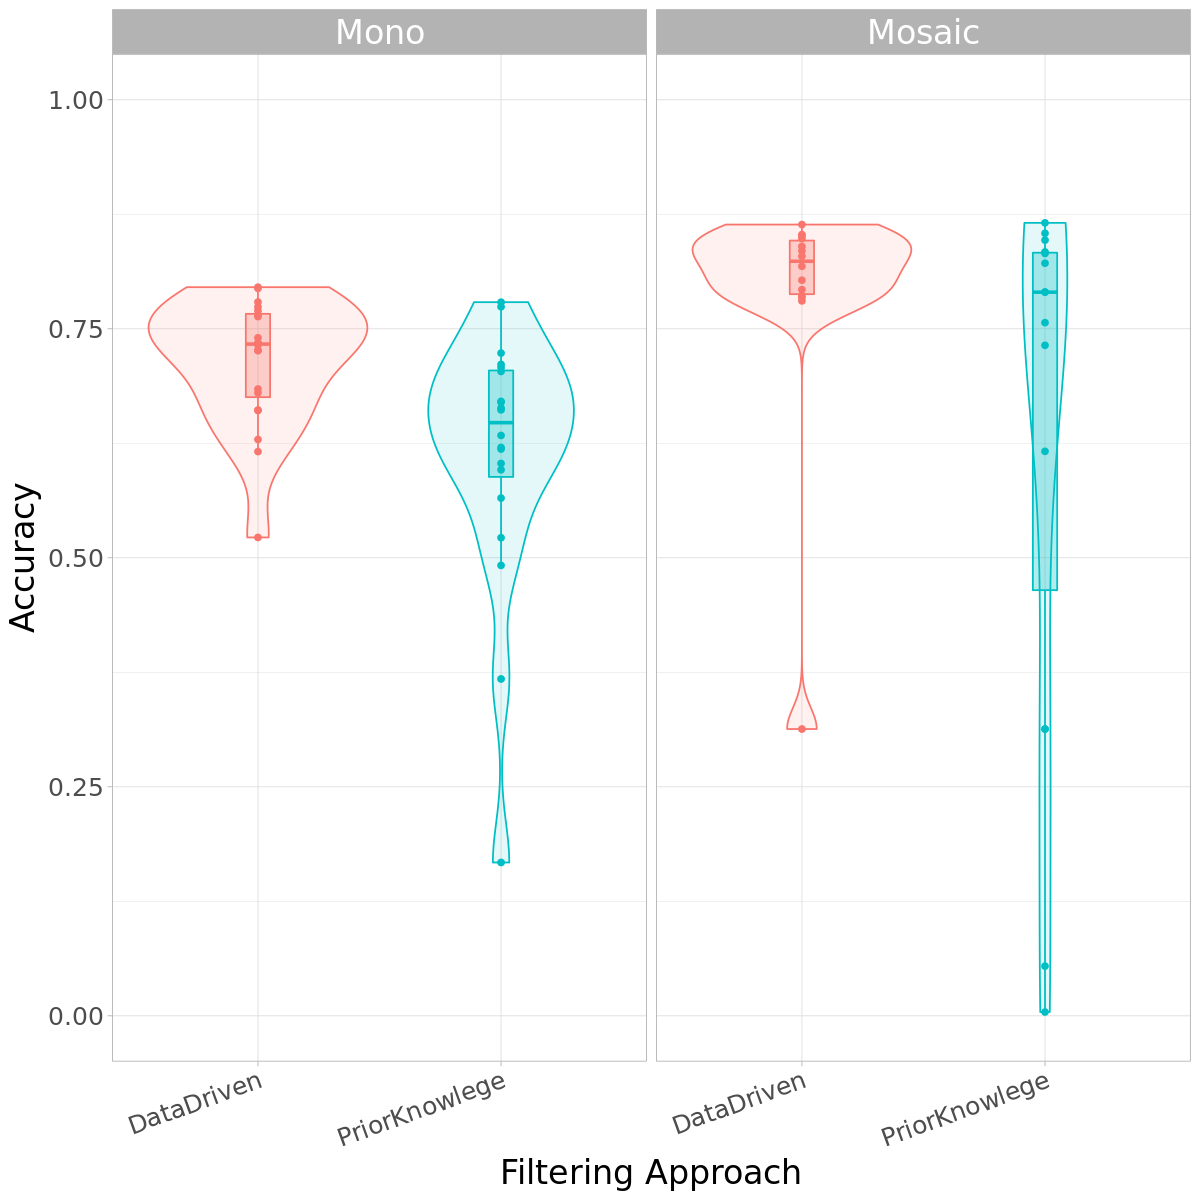

In [17]:

folders <- list.files("../Data/GRNs_subsets/", pattern = "000", full.names = T)
files <- unlist(lapply(folders, function(folder) list.files(folder, pattern = ".json", full.names = T)))
data <- as.data.frame(do.call(rbind, lapply(files, function(file) rjson::fromJSON(file=file))))

data <- data %>% separate(col = tag, into = c("Data", "Nr", "Set","Normalization", "Method","Knowledge", "selectedEdges"), sep = "_")    

data[2:3] = lapply(data[2:3], FUN = function(y){as.numeric(y)})
data[7:10] = lapply(data[7:10], FUN = function(y){as.numeric(y)})
data$Knowledge[data$Knowledge == 100] <- "PriorKnowlege"
data$Knowledge[data$Knowledge == 0] <- "DataDriven"                                           
                        
nrow(data)
plot <- ggplot(data, aes(Knowledge, as.numeric(accuracy), color=Knowledge, fill=Knowledge))+ xlab("Filtering Approach") + ylab("Accuracy") + 
geom_violin(alpha=0.1)+ geom_boxplot(width=0.1, alpha=0.3)+theme_light()+theme(legend.position = "none")+facet_grid(cols = vars(Data))+ylim(0,1)+
                                            theme(axis.text=element_text(size=15), axis.title=element_text(size=20),
          legend.position="none",strip.text = element_text(size=20), axis.text.x = element_text(angle = 20, hjust = 1))+
                                            geom_point()
ggsave(paste0(output, "poster_figure5.png"), plot = plot, device = "png", dpi=350,  width=178, height = 75, units = "mm")
plot

Warning message in data.table::fread(data, sep = ",", verbose = F):
“Detected 6584 column names but the data has 6585 columns (i.e. invalid file). Added 1 extra default column name for the first column which is guessed to be row names or an index. Use setnames() afterwards if this guess is not correct, or fix the file write command that created the file to create a valid file.”
Using id as id variables

<sparse>[ <logic> ] : .M.sub.i.logical() maybe inefficient

<sparse>[ <logic> ] : .M.sub.i.logical() maybe inefficient

<sparse>[ <logic> ] : .M.sub.i.logical() maybe inefficient

<sparse>[ <logic> ] : .M.sub.i.logical() maybe inefficient

Warning message:
“Removed 93 rows containing missing values (geom_point).”
Warning message:
“Removed 93 rows containing missing values (geom_point).”
Warning message:
“Removed 93 rows containing missing values (geom_point).”
Warning message:
“Removed 93 rows containing missing values (geom_point).”
Warning message:
“Removed 93 rows containing missing 

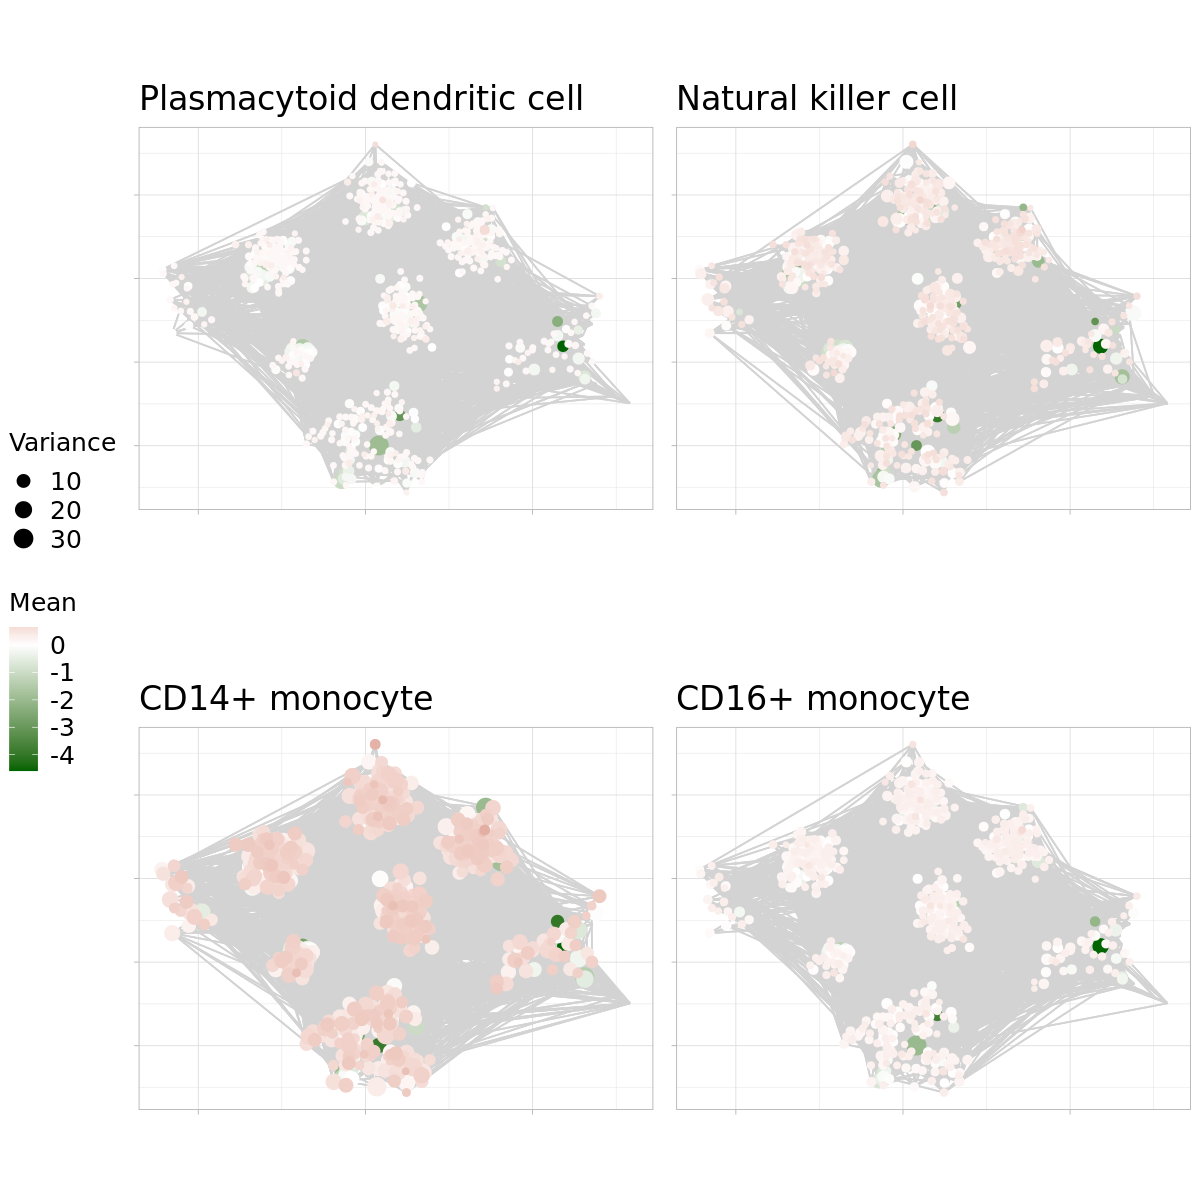

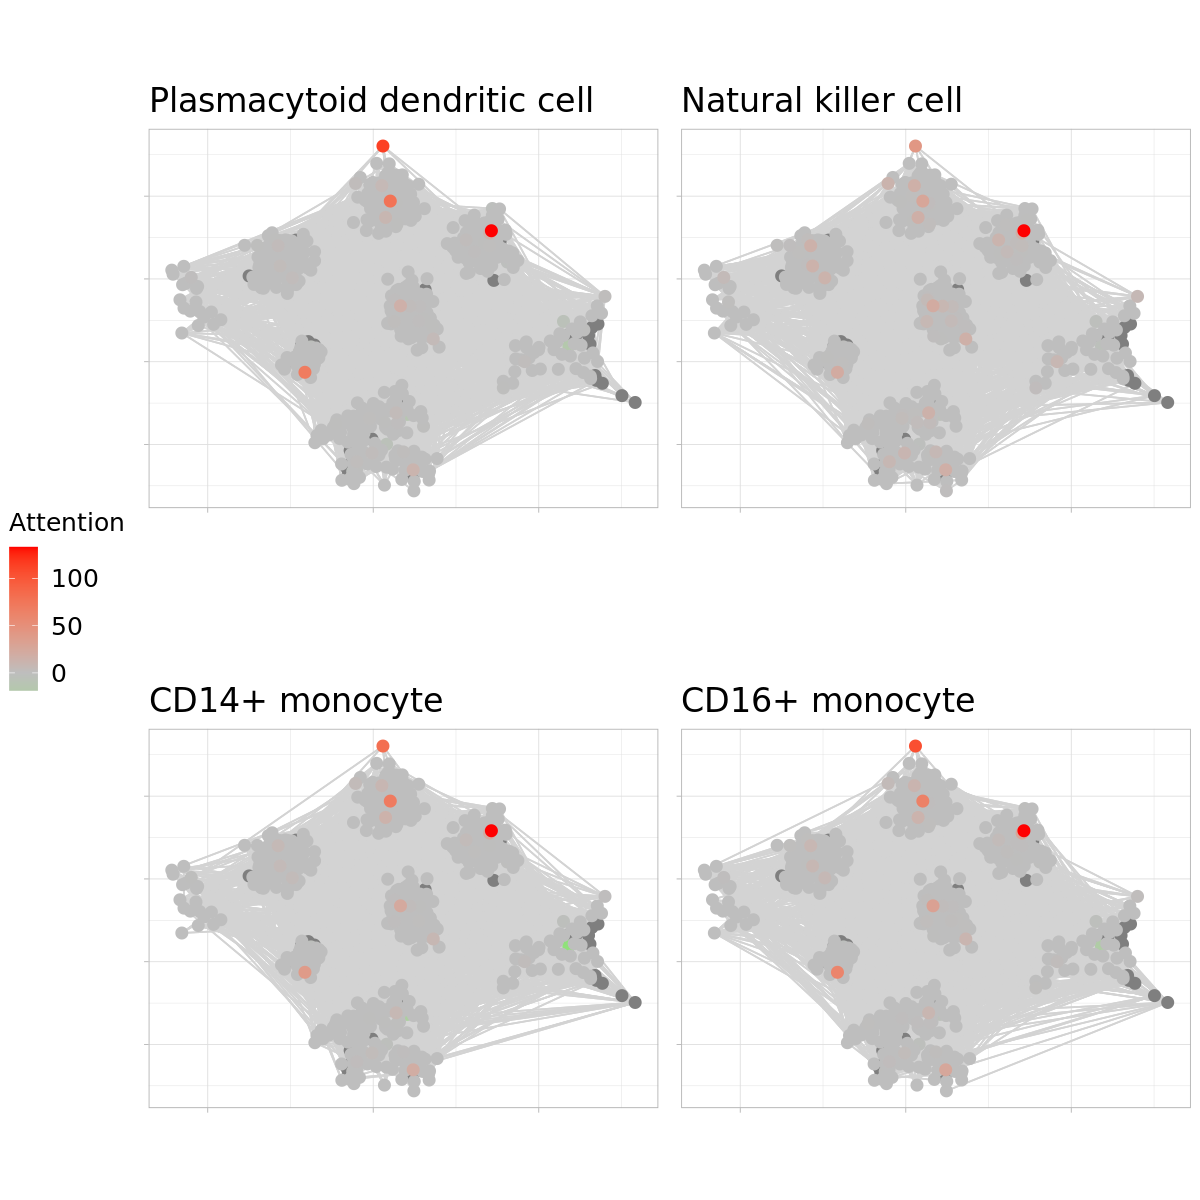

In [20]:
folder <- "../Data/GRNs_full/PBMC_mono_L1_Spearman_0_5000/"

celltypes <- c("Plasmacytoid dendritic cell", "Natural killer cell", "CD14+ monocyte", "CD16+ monocyte")
AM_DD <- read.csv(paste0(folder, "adj.txt"))
data_DD <- readData(paste0(folder, "expression.txt"))

data_DD <- data_DD[rownames(data_DD) %in% colnames(AM_DD),]
meta_DD <- read.csv(paste0(folder, "classes_train.txt"))

graph <- get_GRN_graph(AM_DD)

sets <- lapply(celltypes, function (celltype) 
                   get_class_info(as.data.frame(data_DD), as.data.frame(meta_DD), celltype))               
set <- do.call(rbind, sets) 

              
attention_DD <- read.csv(paste0(folder, "attentionmap.txt"), sep="\t", header=T)
attention_DD$X <- NULL
features <- read.csv(paste0(folder, "feature_names.txt"), header=F)$V1
colnames(attention_DD) <- unique(meta_DD$class_)

rownames(attention_DD) <- features
attention_DD$id <- rownames(attention_DD)

attention <- reshape2::melt(attention_DD)
colnames(attention) <- c("gene", "celltype", "attention")
set <- merge(set, attention)
cluster <- cluster_louvain(graph)

weigths <- ifelse(igraph::crossing(cluster, graph), 1 * E(graph)$weight, 500 * E(graph)$weight)
layout<- layout_with_fr(graph, weights = weigths)
set$variances <- abs(set$variances)

graphs_train <- lapply(celltypes, function(type) visualize_GRN(graph = graph, data = set, color = "means",
                                                                       celltype=type,  layout = layout,
                                                                       rangeMean = c(min(set$means), max(set$means)), 
                                                                       type="Expression", size="variances", rangeVar= c(1, 5)))
plot1 <- ggpubr::ggarrange(plotlist = graphs_train, common.legend = T, legend="left",
                              ncol=sqrt(length(celltypes)), nrow= sqrt(length(celltypes)))
                       
ggsave(paste0(output, "poster_figure6.png"), plot = plot1, device = "png", dpi=350,  width=200, height = 180, units = "mm")
plot1  
                       
                       
graphs_train <- lapply(celltypes, function(type) visualize_GRN(graph = graph, data = set, color = "attention",
                                                                       celltype=type,  layout = layout,
                                                                       rangeMean = c(min(set$means), max(set$means)), 
                                                                       type="Attention"))
plot2 <- ggpubr::ggarrange(plotlist = graphs_train, common.legend = T, legend="left",
                              ncol=sqrt(length(celltypes)), nrow= sqrt(length(celltypes)))
                       
ggsave(paste0(output, "poster_figure7.png"), plot = plot2, device = "png", dpi=350,  width=200, height = 180, units = "mm")
plot2 

Warning message in data.table::fread(data, sep = ",", verbose = F):
“Detected 6584 column names but the data has 6585 columns (i.e. invalid file). Added 1 extra default column name for the first column which is guessed to be row names or an index. Use setnames() afterwards if this guess is not correct, or fix the file write command that created the file to create a valid file.”
Using id as id variables

<sparse>[ <logic> ] : .M.sub.i.logical() maybe inefficient

<sparse>[ <logic> ] : .M.sub.i.logical() maybe inefficient

<sparse>[ <logic> ] : .M.sub.i.logical() maybe inefficient

<sparse>[ <logic> ] : .M.sub.i.logical() maybe inefficient

Warning message:
“Removed 18 rows containing missing values (geom_point).”
Warning message:
“Removed 18 rows containing missing values (geom_point).”
Warning message:
“Removed 18 rows containing missing values (geom_point).”
Warning message:
“Removed 18 rows containing missing values (geom_point).”
Warning message:
“Removed 18 rows containing missing 

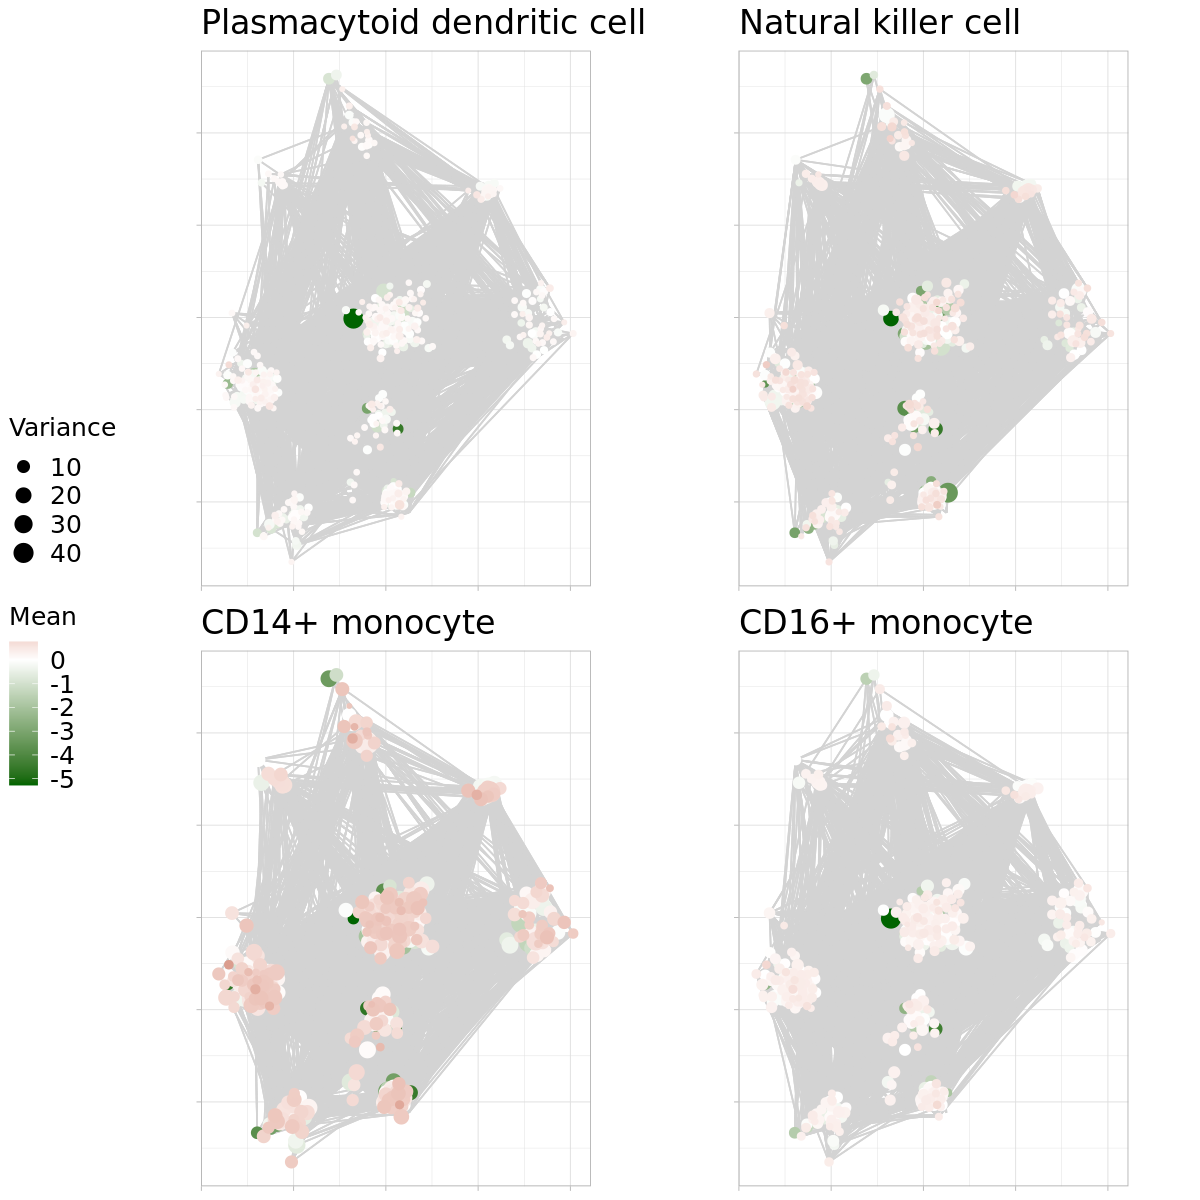

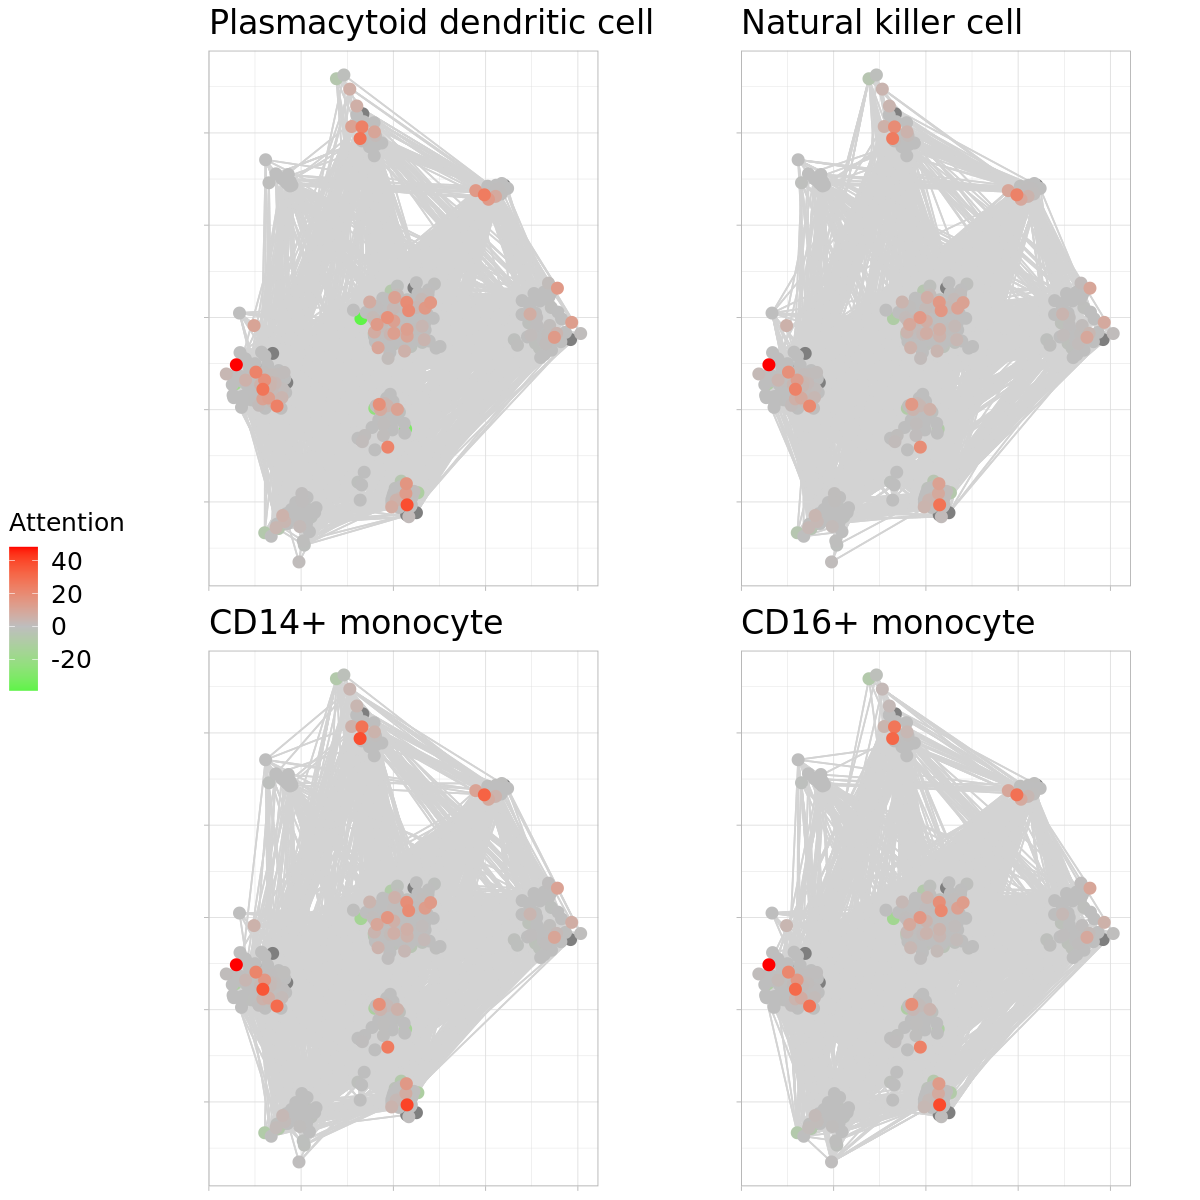

In [21]:
folder <- "../Data/GRNs_full/PBMC_mono_L1_Spearman_100_5000/"

celltypes <- c("Plasmacytoid dendritic cell", "Natural killer cell", "CD14+ monocyte", "CD16+ monocyte")
AM_DD <- read.csv(paste0(folder, "adj.txt"))
data_DD <- readData(paste0(folder, "expression.txt"))

data_DD <- data_DD[rownames(data_DD) %in% colnames(AM_DD),]
meta_DD <- read.csv(paste0(folder, "classes_train.txt"))

graph <- get_GRN_graph(AM_DD)

sets <- lapply(celltypes, function (celltype) 
                   get_class_info(as.data.frame(data_DD), as.data.frame(meta_DD), celltype))               
set <- do.call(rbind, sets) 
attention_DD <- read.csv(paste0(folder, "attentionmap.txt"), sep="\t", header=T)
attention_DD$X <- NULL
features <- read.csv(paste0(folder, "feature_names.txt"), header=F)$V1
colnames(attention_DD) <- unique(meta_DD$class_)

rownames(attention_DD) <- features
attention_DD$id <- rownames(attention_DD)

attention <- reshape2::melt(attention_DD)
colnames(attention) <- c("gene", "celltype", "attention")
set <- merge(set, attention)
cluster <- cluster_louvain(graph)

weigths <- ifelse(igraph::crossing(cluster, graph), 1 * E(graph)$weight, 500 * E(graph)$weight)
layout<- layout_with_fr(graph, weights = weigths)
set$variances <- abs(set$variances)

graphs_train <- lapply(celltypes, function(type) visualize_GRN(graph = graph, data = set, color = "means",
                                                                       celltype=type,  layout = layout,
                                                                       rangeMean = c(min(set$means), max(set$means)), 
                                                                       type="Expression", size="variances", rangeVar= c(1, 5)))
plot1 <- ggpubr::ggarrange(plotlist = graphs_train, common.legend = T, legend="left",
                              ncol=sqrt(length(celltypes)), nrow= sqrt(length(celltypes)))
                       
ggsave(paste0(output, "poster_figure8.png"), plot = plot1, device = "png", dpi=350,  width=200, height = 180, units = "mm")
plot1  
                       
                       
graphs_train <- lapply(celltypes, function(type) visualize_GRN(graph = graph, data = set, color = "attention",
                                                                       celltype=type,  layout = layout,
                                                                       rangeMean = c(min(set$means), max(set$means)), 
                                                                       type="Attention"))
plot2 <- ggpubr::ggarrange(plotlist = graphs_train, common.legend = T, legend="left",
                              ncol=sqrt(length(celltypes)), nrow= sqrt(length(celltypes)))
                       
ggsave(paste0(output, "poster_figure9.png"), plot = plot2, device = "png", dpi=350,  width=200, height = 180, units = "mm")
plot2                       